In [33]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
 num_words=10000)

In [34]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [35]:
import numpy as np
def vector_sequence(sec,demention=10000):
    results = np.zeros((len(sec),demention))
    for i,sec in enumerate(sec):
        results[i,sec] = 1.
    return results
x_train = vector_sequence(train_data)
x_test = vector_sequence(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [36]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [37]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss=losses.binary_crossentropy,
                metrics=[metrics.binary_accuracy])
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5266 - binary_accuracy: 0.7749 - val_loss: 0.4217 - val_binary_accuracy: 0.8405
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3260 - binary_accuracy: 0.8915 - val_loss: 0.3210 - val_binary_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2396 - binary_accuracy: 0.9212 - val_loss: 0.2981 - val_binary_accuracy: 0.8797
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1968 - binary_accuracy: 0.9325 - val_loss: 0.2795 - val_binary_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1599 - binary_accuracy: 0.9482 - val_loss: 0.2765 - val_binary_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1376 - binary_accuracy: 0.9571 - val_loss: 0.2903 - val_binary_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss

In [38]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

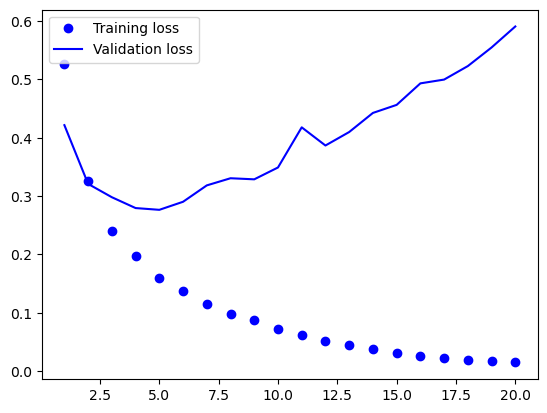

In [39]:
history_dict=history.history
import matplotlib.pyplot as plt
loss_v=history_dict['loss']
val_loss_v=history_dict['val_loss']
epochs=range(1,len(loss_v)+1)
plt.plot(epochs,loss_v,'bo',label='Training loss')
plt.plot(epochs,val_loss_v,'b',label='Validation loss')
plt.legend()
plt.show()

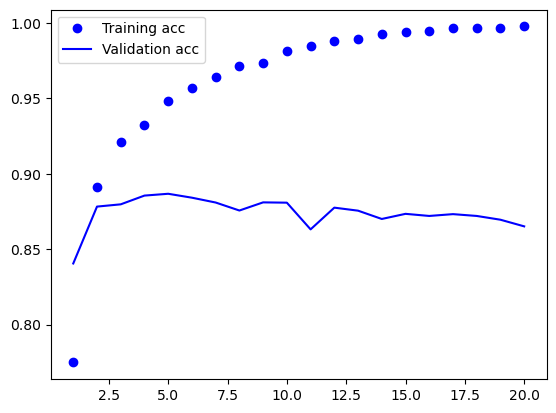

In [40]:
b_acc=history_dict['binary_accuracy']
val_b_acc=history_dict['val_binary_accuracy']
plt.plot(epochs,b_acc,'bo',label='Training acc')
plt.plot(epochs,val_b_acc,'b',label='Validation acc')
plt.legend()
plt.show()


In [49]:
model=models.Sequential()
model.add(layers.Dense(64,activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(64,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1438 - accuracy: 0.7926
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0798 - accuracy: 0.8939
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0666 - accuracy: 0.9123
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.1054 - accuracy: 0.8600


[0.10540687292814255, 0.8599600195884705]

In [43]:
model.predict(x_test)


782/782 [==============================] - 1s 976us/step


array([[0.17393155],
       [0.9999151 ],
       [0.66733277],
       ...,
       [0.08042722],
       [0.06644318],
       [0.4219989 ]], dtype=float32)